In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
t0 = time.time()
train_samples = 5000
X,Y = fetch_openml('mnist_784',version =1,return_X_y = True)#从openml上获取名为minist784版本为1的数据集，returnx为data y为label
random_state = check_random_state(0)#返回种子为0的randomstate实例
permutation = random_state.permutation(X.shape[0])#返回x.shape[0]数量的随即排序数列
X = X[permutation]#对于ndarray直接操作索引就能改变顺序如下
#arr = np.array([10, 20, 30, 40, 50])
#>>> idx = [1, 0, 3, 4, 2]
#>>> arr[idx]
#输出：array([20, 10, 40, 50, 30])
Y = Y[permutation]
print(X.shape)

(70000, 784)


In [3]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = train_samples,test_size = 10000)
scaler = StandardScaler()#标准化方法对每个属性/每列来说所有数据都聚集在0附近，方差值为1
X_train = scaler.fit_transform(X_train)#fit用于X的均值，方差，最大值，最小值,transform用于数据与处理例如进行标准化，降维，归一化
#fit_transform两者结合
X_test = scaler.transform(X_test)
clf = LogisticRegression(C=50./train_samples,multi_class="multinomial",penalty ="l1",solver="saga",tol=0.1)#C正则化强度的倒数越小强度越大 multi_class多分类问题策略ovo ovr等 
#penalty正则化方法 solver 求解最优化问题的方法 saga快速梯度下降法 newton-cg：牛顿法等 tol 判断收敛的阈值
clf.fit(X_train,Y_train)
print(clf.classes_)#样本的类列表
print(clf.coef_.shape)#权重列表 一类784个Wi 共10类
print(clf.intercept_.shape)#bias 偏置 10类10个
sparsity = np.mean(clf.coef_==0)*100#计算权重0个数的平均衡量稀疏性 100%百分记
score = clf.score(X_test,Y_test)
print("sparsity with L1 penalty : %.2f%%" % sparsity)
print("test score with L1 penalty: %.4f" % score)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
(10, 784)
(10,)
sparsity with L1 penalty : 75.87%
test score with L1 penalty: 0.8243


example run in 238.429 s


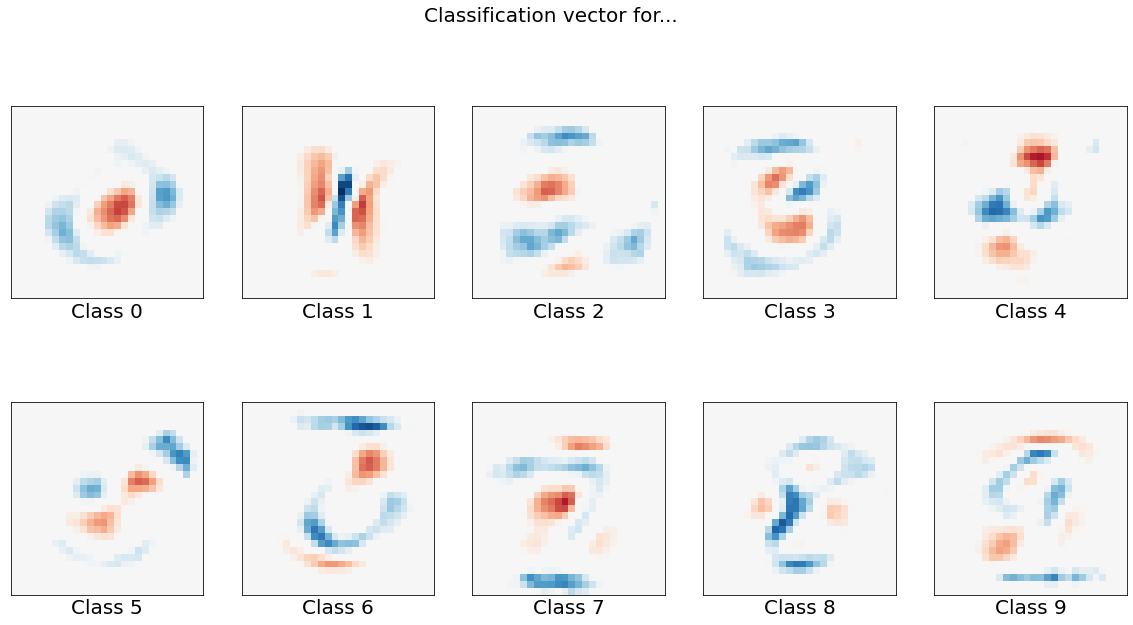

In [7]:
coef = clf.coef_.copy()
plt.figure(figsize=(20,10))
scale = np.abs(coef).max()#abs和max都能矩阵运算ndarray
for i in range(10):
    l1_plot = plt.subplot(2,5,i+1)#2行5列的网格上的第i+1个位置画子图
    l1_plot.imshow(coef[i].reshape(28,28),interpolation = "nearest",#X位置图片或者array都行 cmap 用于把标量映射到颜色 vmin vmax颜色图覆盖数据范围
                   cmap = plt.cm.RdBu,vmin = -scale,vmax = scale)
    l1_plot.set_xticks(())#坐标轴设定什么都没有就是不画坐标轴了
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i,fontsize = 20)
plt.suptitle("Classification vector for...",fontsize = 20)
run_time = time.time()-t0
print('example run in %.3f s' % run_time)
plt.show()#蓝色是正权重 橘色是负权重